<a href="https://colab.research.google.com/github/SaraCarr/2024_Intro_Python/blob/main/ex_W2_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Ocean Floats Data Analysis

**Learning Objectives**

*    Creating new arrays using `linspace` and `arange`
*    Computing basic formulas with `numpy` arrays
*    Loading data from `.npy` files
*    Performing reductions (e.g. `mean`, `std` on `numpy` arrays)
*    Making 1D line plots
*    Making scatterplots
*    Annotating plots with titles and axes

In this problem, we use real data from ocean profiling floats. [ARGO](http://www.argo.ucsd.edu/) floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. [ARGO](http://www.argo.ucsd.edu/) floats collect one “profile” (a set of messurements at different depths or “levels”).

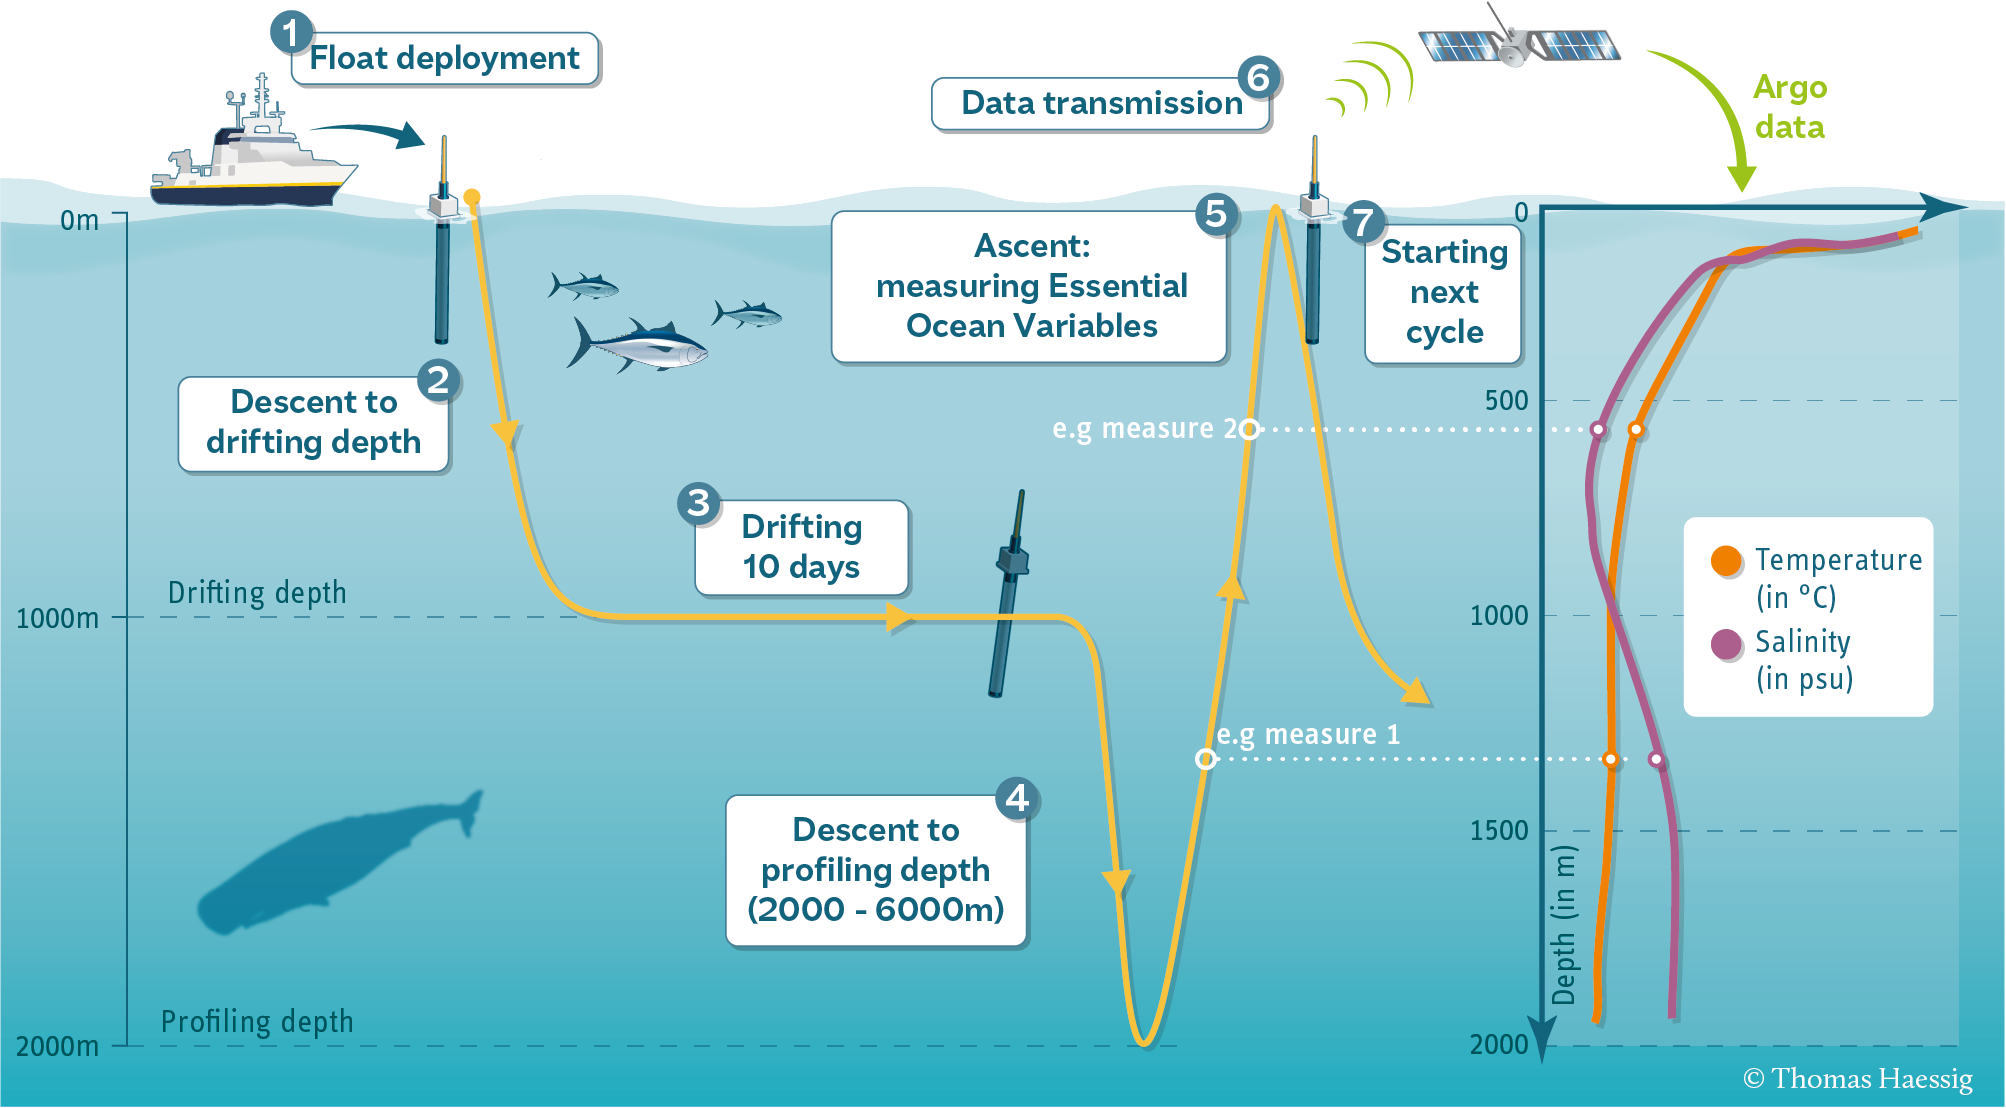


Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let’s start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise. The following code will give you a list of `.npy` files that you can open in the next step.

In [2]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files




Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy']

In [3]:
import numpy as np

**Q1) Load each data file as a `numpy` array.**

You can use whatever names you want for your arrays, but we recommend:

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

Hint 1: Look at the file name (the items in `files`) to know which files corresponds to which variable.

Hint 2: Check out the documentation for [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Display the names of the items in files here

In [4]:
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy']

Then, load the files as `numpy` arrays, for instance using list comprehension

In [7]:
P,date,lat,S,level,lon,T = [np.load(files[index]) for index in range(7)]
print("Longitude:", lon)
print("Level:", level)
print("P:", P)
print("Date:", date)
print("S:", S)
print("T:", T)
print("Latitude:", lat)


Longitude: [-39.13  -37.282 -36.9   -36.89  -37.053 -36.658 -35.963 -35.184 -34.462
 -33.784 -32.972 -32.546 -32.428 -32.292 -32.169 -31.998 -31.824 -31.624
 -31.433 -31.312 -31.107 -31.147 -31.044 -31.14  -31.417 -31.882 -32.145
 -32.487 -32.537 -32.334 -32.042 -31.892 -31.861 -31.991 -31.883 -31.89
 -31.941 -31.889 -31.724 -31.412 -31.786 -31.561 -31.732 -31.553 -31.862
 -32.389 -32.318 -32.19  -32.224 -32.368 -32.306 -32.305 -32.65  -33.093
 -33.263 -33.199 -33.27  -33.237 -33.221 -33.011 -32.844 -32.981 -32.784
 -32.607 -32.87  -33.196 -33.524 -33.956 -33.944 -33.71  -33.621 -33.552
 -33.828 -34.11  -34.38 ]
Level: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]
P: [[   6.80000019    6.0999999     6.5        ...    7.0999999
     7.20000029    6.5       ]
 [  10.69999981   10.59999943   10.3999

**Q2) Recreate the `level` array using `np.arange` and `np.linspace`**

Hints:

*   The documentation for `np.arange` is [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
*   The documentation for `np.linspace` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   The documentation for `np.testing.assert_equal` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Display the `level` array

In [8]:
print("Level Array:")
print(level)

Level Array:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recreate the `level` array using `np.arange` and call it `level_arange`

In [9]:
level_arange = np.arange(0,78)
print(level_arange)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Check that `level` and `level_arange` are equal using `np.testing.assert_equal`

In [10]:
#np.testing.assert_equal(level,level_arange)

try:
    np.testing.assert_equal(level, level_arange)
    print("The arrays are equal.")
except AssertionError as e:
    print("The arrays are not equal.")
    print(e)  # Print the AssertionError message

The arrays are equal.


Recreate the `level` array using `np.linspace` and call it `level_linspace`

In [11]:
#.astype(int)> normalement avec linspace ça va faire des intervalles equally spaced entre 0 et 77
# avec 77 nbre au milieu mais ça fait que des nombre a , et ducoup ça sera pas la même matrice que avec arange
#> donc la c'est pout transformer en nbre plein
level_linspace = np.linspace(0,77,78).astype(int) # de 0 à 77, avec 78 nombre dedans ( 0=1!)
print(level_linspace)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Check that `level` and `level_linspace` are equal using `np.testing.assert_equal`

In [12]:
#np.testing.assert_equal(level,level_linspace)

try:
    np.testing.assert_equal(level,level_linspace)
    print("The arrays are equal.")
except AssertionError as e:
    print("The arrays are not equal.")
    print(e)  # Print the AssertionError message

The arrays are equal.


**Q3) Examine the shapes of `T`, `S` and `P` compared to `lon`, `lat`, `date` and `level`. How do you think they are related?**

Hint: Check out the [NDArrays subsection](#NDArrays)

Display the shapes of all loaded variables

In [13]:
print("T shape:", T.shape)
print("S shape:", S.shape)
print("P shape:", P.shape)
print("Lon shape:", lon.shape)
print("Lat shape:", lat.shape)
print("Date shape:", date.shape)
print("Level shape:", level.shape)
#les 4 derniers ≠ matrices! vecteur 1D

T shape: (78, 75)
S shape: (78, 75)
P shape: (78, 75)
Lon shape: (75,)
Lat shape: (75,)
Date shape: (75,)
Level shape: (78,)


Based on the shapes, which dimensions do you think are shared among the arrays?

P,T, S : 78 measures at 75 location

Lon, date, lat : 75, correspond a le seconde dimension de PTS (so they share the snd dimension!)

level shares the first dimension with PTS


**Q4) Based on the formula below, calculate the seawater density `relative_density`, relative to pure water, as a function of the temperature, the salinity, and the pressure.**

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

where:

*    The densities $\rho$ and $ρ_{Pure\ Water}$ are in units $kg/m^{3}$.
*    The constants $a$, $b$, and $c$ are provided below.
*    The function to calculate the conservative temperature $\Theta$ (in units Celcius) from temperature, salinity, and pressure is provided below.
*    The temperature $T$ is in units Celcius.
*    The salinity $S$ is in units $g/kg$.
*    The pressure $p$ is in units $dbar$.

Hint: The loaded `numpy` arrays `temperature`, `salinity`, and `pressure` already have the right units and no conversion is needed.

Sources:

1) [*Roquet, Fabien, et al. "Defining a simplified yet “realistic” equation of state for seawater." Journal of Physical Oceanography 45.10 (2015): 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). [(License)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Below are the constants a, b, and c:

In [14]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Let's import the library [`gsw`](https://teos-10.github.io/GSW-Python/) that contains the function `CS_from_t`to calculate the conservative temperature $\Theta$ from temperature, salinity, and pressure.

In [15]:
!pip install gsw
from gsw import CT_from_t

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 19.8 MB/s eta 0:00:00


Now it's all up to you. Here's the equation to avoid having to scroll back up:

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculate the conservative temperature

Hint: use [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [16]:
Cons_T = CT_from_t(S,P,T)
Cons_T.shape #bonne taille donc chill




(78, 75)

In [29]:
P.shape
S.shape

(78, 75)

Calculate the `relative density` using the equation above

In [17]:
relative_density = a*S+b*Cons_T+c*(Cons_T**2)
print(relative_density)

[[ 2.67237250e+01  2.67277921e+01  2.67160825e+01 ...  2.68203708e+01
   2.67722111e+01  2.67903321e+01]
 [ 2.60809768e+01  2.60122661e+01  2.60885672e+01 ...  2.62000035e+01
   2.59688138e+01  2.61614138e+01]
 [ 2.50960572e+01  2.53268220e+01  2.51902775e+01 ...  2.51390691e+01
   2.51039658e+01  2.50380075e+01]
 ...
 [-3.19335279e+16 -3.17931917e+16 -3.18400505e+16 ... -3.17237880e+16
  -3.18868463e+16 -3.17460628e+16]
 [-4.56055863e+16 -4.56378958e+16 -4.56059308e+16 ... -4.58347032e+16
  -4.57044741e+16 -4.55399289e+16]
 [-6.46005074e+16 -6.40184786e+16 -6.42427526e+16 ...             nan
  -6.50989794e+16             nan]]


**Q4) Make a plot for each column of data in `T`, `S`, `P`, and
`relative_density` (four plots)**

For this question, we have to use the [Pyplot interface](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) of the [Matplotlib library](https://matplotlib.org/) for visualization even if we have not covered it extensively in class yet. But fear not as we provide easy-to-follow instructions below. 😊

The first step is to import Pyplot. Simply execute the code below.

In [18]:
import matplotlib.pyplot as plt

Then, we will plot variables as a function of the ocean depth, `level`. Simply read the documentation [at this link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to infer the correct syntax. Label your axes using `plt.xlabel` and `plt.ylabel`, and add a title using `plt.title`.

Hint: The vertical scale should use the `level` data to be consistent with oceanographic conventions.

Hint 2: Each plot should have a line for each column of data. It will look messy, like the plot below:

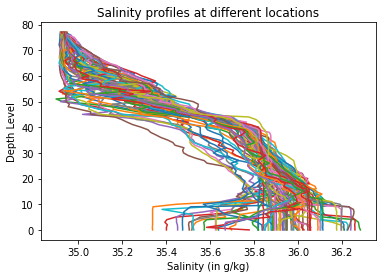

Text(0.5, 1.0, 'T vs Depth')

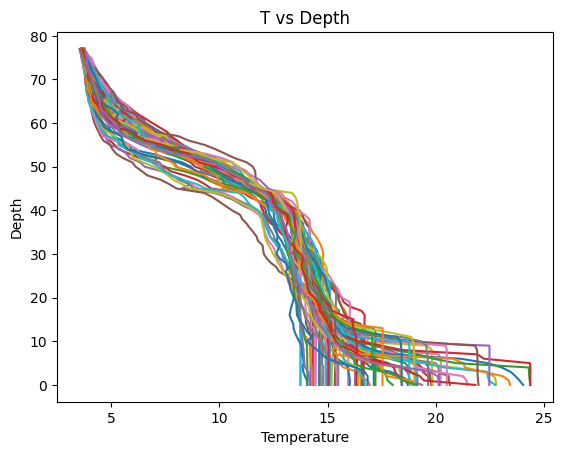

In [33]:
plt.plot(T,level); # The semi-colon prevents printing the line objects
plt.xlabel("Temperature") # Takes a string as argument
plt.ylabel("Depth")
plt.title("T vs Depth")

Make more plots below:

Text(0.5, 1.0, 'Salinity vs Depth')

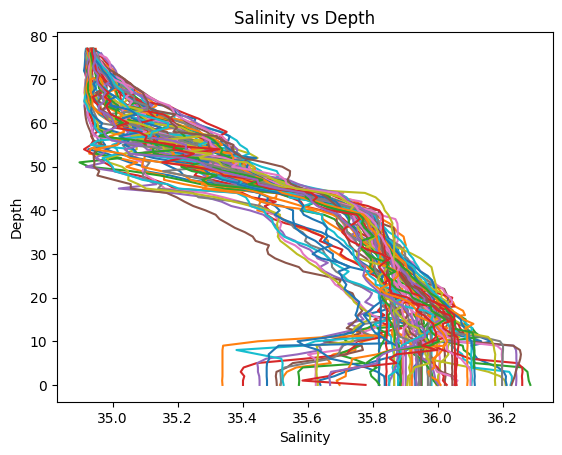

In [34]:
plt.plot(S,level);
plt.xlabel("Salinity")
plt.ylabel("Depth")
plt.title("Salinity vs Depth")

Text(0.5, 1.0, 'Pression vs Depth')

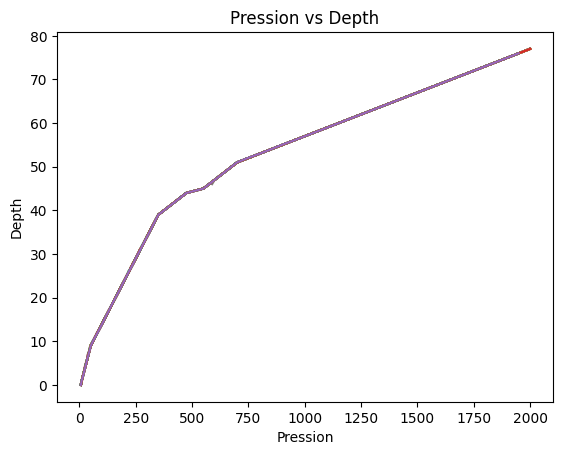

In [35]:
plt.plot(P,level);
plt.xlabel("Pression")
plt.ylabel("Depth")
plt.title("Pression vs Depth")

Text(0.5, 1.0, 'Relative density vs Depth')

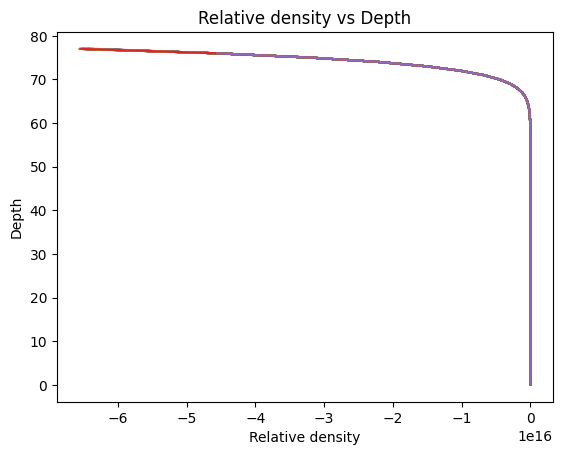

In [36]:
plt.plot(relative_density,level);
plt.xlabel("Relative density")
plt.ylabel("Depth")
plt.title("Relative density vs Depth")

**Q5) Compute the mean and standard deviation of each of `T`, `S`, `P`, and `seawater_density` at each depth in `level`.**

Hint: You may want to read the documentation at [this link](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [this link](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Hint 2: You can check that you took the mean and standard deviations along the correct axes by checking the `shape` of your results.

Compute the means...

In [19]:
mean_t= np.mean(T, axis=1)
print(mean_t)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333         nan         nan         nan
         nan         nan         nan         nan         nan         nan]


In [28]:
mean_s=np.mean(S, axis=1)
mean_p=np.mean(P,axis = 1)
mean_d=np.mean(relative_density,axis=1)

... and the standard deviations.

In [21]:
std_t = np.std(T,axis=1)
std_s = np.std(S,axis=1)
std_p = np.std(P,axis=1)
std_d = np.std(relative_density,axis=1)

Check that they have the same shape as your vertical level `lev` coordinate:

In [22]:
np.testing.assert_equal(mean_t.shape,level.shape)

**Q6) Now make similar plots, but show only the mean `T`, `S`, `P`, and `seawater_density` at each depth. Show error bars on each plot using the standard deviations.**

Hint: If you are feeling adventurous, you can directly use the [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function.

Hint 2: You should get plots similar to the one below

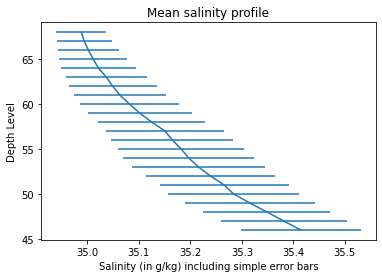

Text(0.5, 1.0, 'Mean salinity profile')

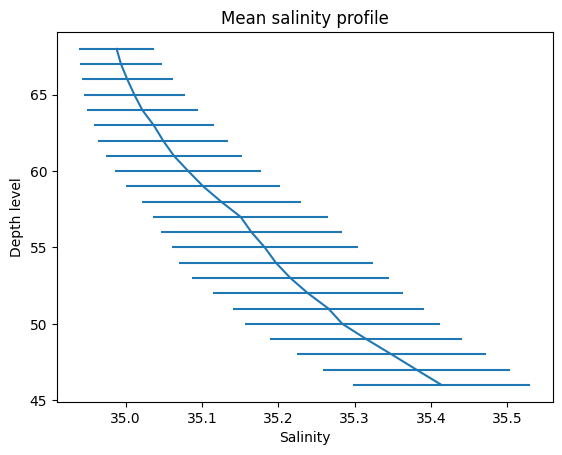

In [26]:
plt.errorbar(mean_s,level,xerr=std_s)
plt.xlabel("Salinity")
plt.ylabel("Depth level")
plt.title("Mean salinity profile")

Three more plots and we'll be all set! 🙂

Text(0.5, 1.0, 'Mean pression profile')

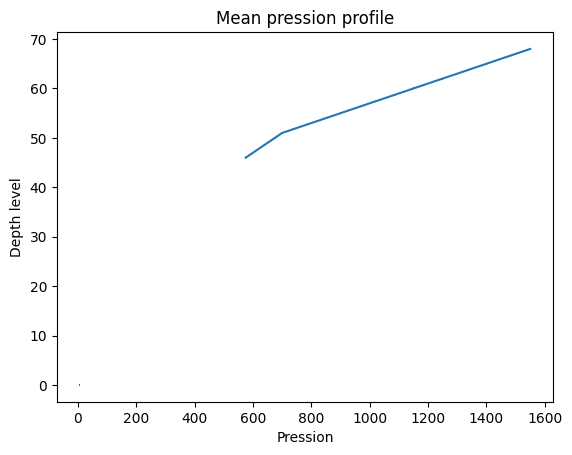

In [29]:
plt.errorbar(mean_p,level,xerr=std_p)
plt.xlabel("Pression")
plt.ylabel("Depth level")
plt.title("Mean pression profile")

Text(0.5, 1.0, 'Mean temperature profile')

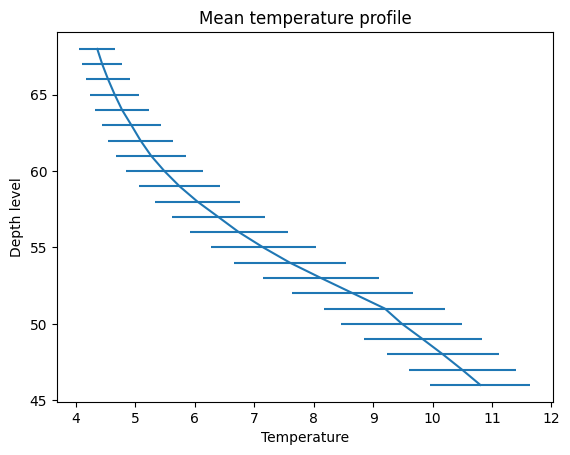

In [30]:
plt.errorbar(mean_t,level,xerr=std_t)
plt.xlabel("Temperature")
plt.ylabel("Depth level")
plt.title("Mean temperature profile")

Text(0.5, 1.0, 'Mean relative density profile')

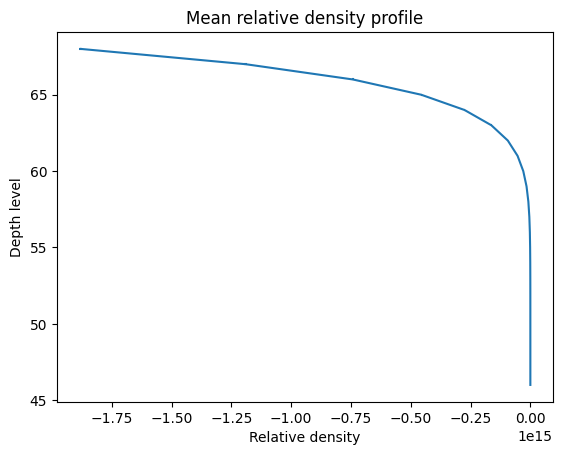

In [31]:
plt.errorbar(mean_d,level,xerr=std_d)
plt.xlabel("Relative density")
plt.ylabel("Depth level")
plt.title("Mean relative density profile")

**Q7) Account For Missing Data**

The profiles contain many missing values. These are indicated by the special “Not a Number” value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes `NaN`. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

Hint: Links to the [`np.nanmean` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) and the [`np.nanstd` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculate the means below ignoring the missing values. We trust that you can now come up with the full syntax yourself 😎

In [35]:
rmean_s = np.nanmean(S,axis=1)
rmean_t = np.nanmean(T,axis=1)
rmean_p = np.nanmean(P,axis=1)
rmean_d = np.nanmean(relative_density,axis=1)

print(rmean_s)

[35.9063218  35.90223138 35.90313435 35.90173139 35.90544583 35.9100359
 35.90946015 35.91343146 35.91967712 35.92615988 35.93195456 35.94055356
 35.94091596 35.93905366 35.93931069 35.93786745 35.93525794 35.93118039
 35.92534328 35.91652257 35.90671895 35.89617843 35.88888019 35.8789927
 35.86946183 35.8598671  35.85061713 35.84211978 35.83150467 35.81969395
 35.80945061 35.80092265 35.79078674 35.77886525 35.76833627 35.75838795
 35.74923783 35.73923559 35.73000444 35.71877237 35.68864513 35.65607159
 35.62678265 35.59231774 35.56205662 35.45401408 35.41392634 35.3810557
 35.34845245 35.31531555 35.28392568 35.26568334 35.2389473  35.21583745
 35.19686081 35.18231257 35.1648436  35.15073542 35.12509338 35.10155869
 35.08199799 35.06317012 35.0490097  35.03678253 35.02174266 35.01135579
 35.00212936 34.99386297 34.98810328 34.98008094 34.97214884 34.96517645
 34.95664983 34.9507985  34.9465696  34.94198907 34.93844852 34.93290652]


Similarly, recalculate the standard deviations ignoring the missing values.

In [34]:
rstd_s = np.nanstd(S,axis=1)
rstd_t = np.nanstd (T,axis=1)
rstd_p = np.nanstd(P,axis=1)
rstd_d = np.nanstd(relative_density,axis=1)

print(rstd_s)

[0.21775056 0.22181831 0.21880847 0.21661592 0.20842504 0.19440186
 0.18227015 0.17652957 0.16993855 0.16035545 0.13927144 0.11711354
 0.10460508 0.09743633 0.0927479  0.08493034 0.08485861 0.08050515
 0.07776356 0.07558179 0.07282218 0.07121873 0.07207327 0.07187564
 0.07096565 0.07295663 0.07539408 0.07641816 0.07825997 0.08340698
 0.08535978 0.08535099 0.08681939 0.09210511 0.0933961  0.09597163
 0.09981623 0.10239233 0.10576448 0.10694631 0.10584218 0.10579345
 0.10557016 0.10840863 0.11562906 0.12566351 0.11644936 0.12211051
 0.12341583 0.12609271 0.12781264 0.12486204 0.12508305 0.12873388
 0.1271157  0.12208639 0.11848103 0.11478619 0.10416219 0.1009587
 0.09565639 0.08961304 0.0856126  0.07880695 0.07300245 0.06582414
 0.05933736 0.05371506 0.04872476 0.04207644 0.0362379  0.02930639
 0.02457704 0.01954141 0.01546896 0.01236431 0.01010649 0.00788405]


**Q8) Create a scatter plot of the longitudinal (`lon`) and latitudinal (`lat`) coordinates of the ARGO floats.**

Again, we have not discussed it in the tutorial, but there is a really convenient scatter plot function called [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) provided by the Pyplot interface.

Bonus: Label your figure using `plt.xlabel`, `plt.ylabel`, and `plt.title`.

Bonus 2: Increase the fontsize of your labels by adding a `fontsize=` argument to the label functions.

Bonus 3: Make your scatter plot beautiful by changing the arguments of [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listed in the documentation, for example `s=`.

Text(0.5, 1.0, 'Mean temperature profile')

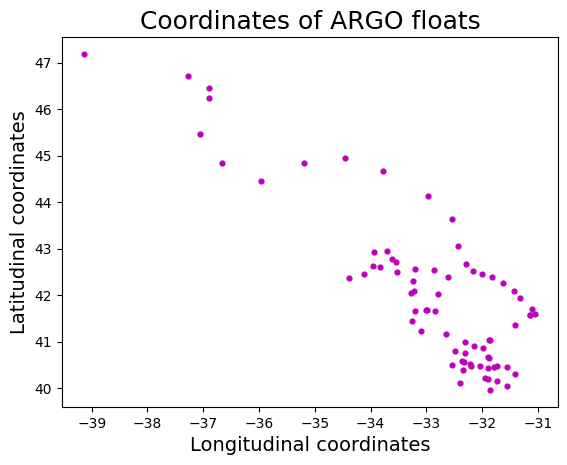

In [41]:
plt.scatter(lon,lat, s=12, c= 'm')
plt.xlabel("Longitudinal coordinates", fontsize=14)
plt.ylabel("Latitudinal coordinates", fontsize=14)
plt.title("Coordinates of ARGO floats",fontsize=18)

___ # More fancy bonuses